In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [4]:
housing = pd.read_csv('housing.csv')

In [5]:
housing.head() # head() method returns top 5 rows from  dataset, that way we can clearly observe dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() # We use info() method For accessing information about dataset such as, properties of data, types of data and number of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


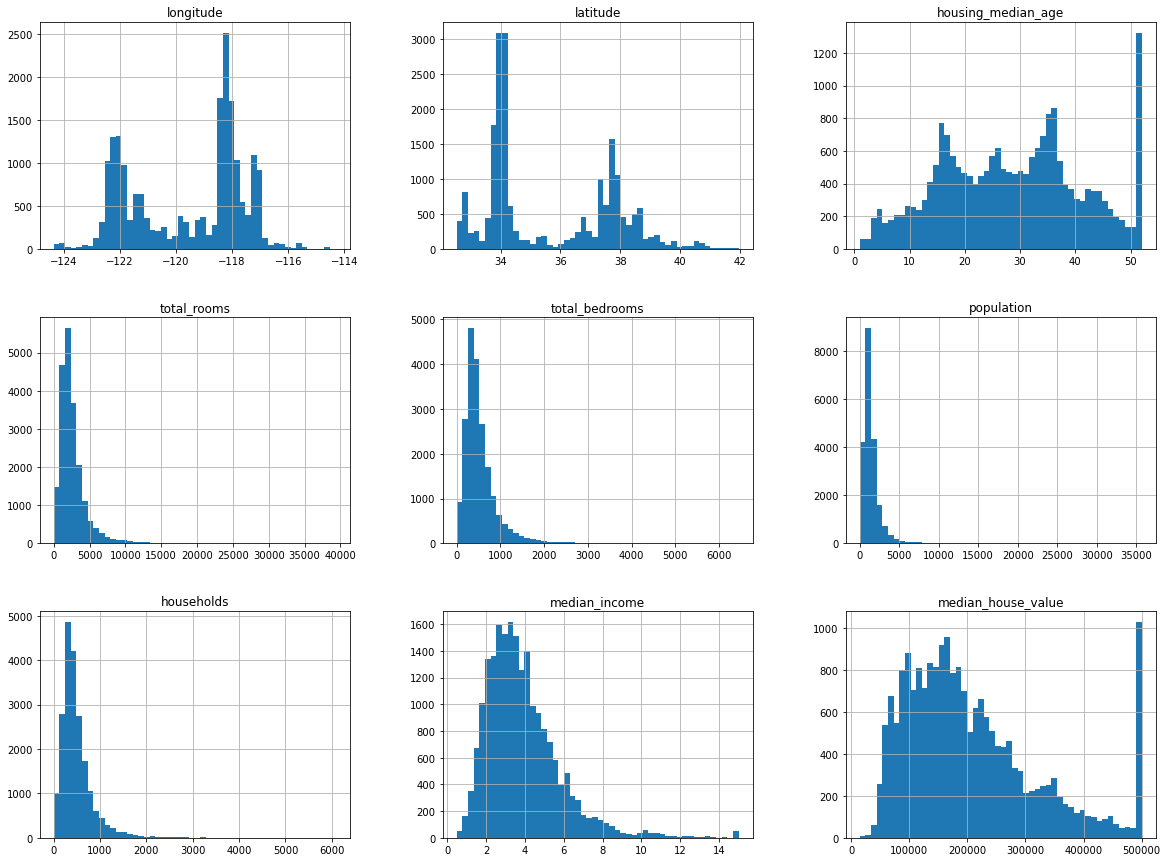

In [7]:
# We plot data as histograms for visualization

housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
housing.isnull().sum() # We must control that whether our data set contains any null values or not.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Analyzing Null values

We detected some null values in the total_bedrooms column, what can we do about it? We can basically replace numeric values with null values using the fillna() method. But what if we want to try another method? In this project, I would like to present you an alternative way of handling null datas.<br>
When we observe the head of the dataset, we see some correlation between the total_bedrooms column and the household column. If we can prove our statement we can replace missing values in total_bedrooms column with the corresponded values in household column. Since we only observed a small part of our dataset, we cannot be completely sure of our statement.<br>

#### To better interpret our statement, let's vizualize the columns total_bedrooms and houses columns.


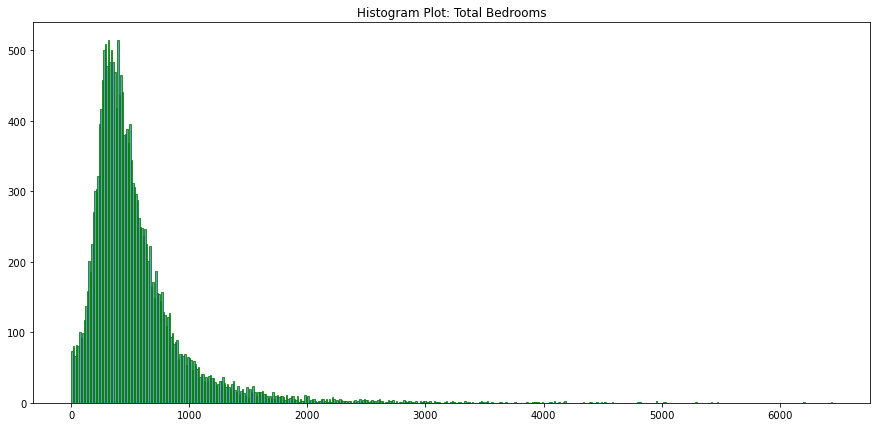

In [9]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Total Bedrooms')

total_bedrooms = housing['total_bedrooms']

plt.hist( total_bedrooms, bins=500, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.show()

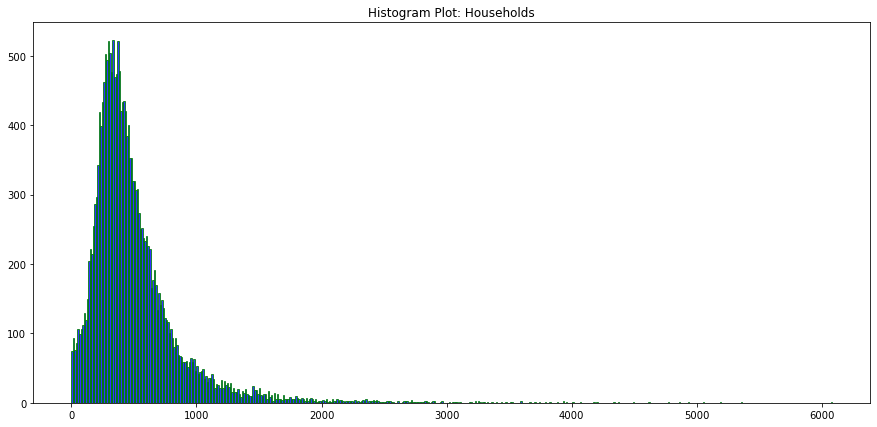

In [10]:
plt.subplots(figsize=(15, 7))

plt.title('Histogram Plot: Households')

households = housing['households']

plt.hist( households, bins=500, alpha=0.8,
          histtype='bar', color='blue',
          edgecolor='green')

plt.show()

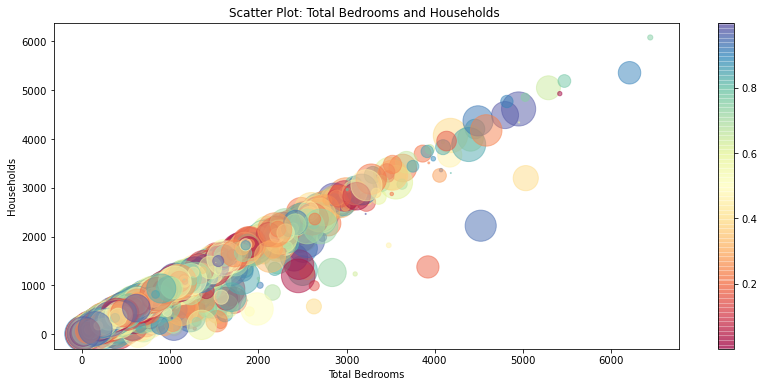

In [11]:
plt.figure(figsize=(14, 6))

plt.rcParams['axes.grid'] = False # For suppressing the depreciation error

plt.title('Scatter Plot: Total Bedrooms and Households ')


N = households.size
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 

plt.xlabel('Total Bedrooms')
plt.ylabel('Households')

plt.scatter(total_bedrooms, households, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

# Applying statistics for observing relationship between total bedrooms and households

As we observed from scatter plot there is a positive trend between total bedrooms and households. So we are supposing a null hypothesis that total bedrooms and households are same attributes. In this case, we need to try to reject our null hypothesis and come up with an alternative hypothesis that assumes total bedrooms and households are not same attributes. <br>
#### We can represent this relationship like that;
__tb__ : Total bedrooms<br>
__hh__ : House holds<br>
__Ho__ :  tb = hh<br>
__Ha__ :  tb != hh<br>


#### What are the steps for testing Null Hypothesis? 
- Specify a significance level α
- Calculate variance for total bedrooms and households
- Calculate standart deviation for total bedrooms and households
- Evaluate p-score using t-test
- Apply p-test, if p-score is greater than significance level accept null hypothesis, if not reject null hypothesis

__For testing our null hypothesis we select our significance level as 0.05__

In [12]:
# Variance total_bedrooms and households
var_total_bedrooms = (np.square(total_bedrooms - total_bedrooms.mean())).sum() / (housing.shape[0] - 1)
var_households = (np.square(households - households.mean())).sum() / (housing.shape[0] - 1)
print(f'Variance of; (total bedrooms: {var_total_bedrooms}, import scipy.stats as stats: {var_households})')

Variance of; (total bedrooms: 175784.4754402569, import scipy.stats as stats: 146176.03990028054)


In [13]:
# Standart deviation for total_bedrooms and households
S_total_bedrooms = np.sqrt(var_total_bedrooms)
S_households = np.sqrt(var_households)
print(f'Standart deviation of; (total bedrooms: {S_total_bedrooms}, households: {S_households})')

Standart deviation of; (total bedrooms: 419.26659232552373, households: 382.32975283161073)


In [14]:
# We can evaluate p score from t-test using scipy.stats library
import scipy.stats as stats

tstat, pvalue = stats.ttest_ind_from_stats(total_bedrooms.mean(), S_total_bedrooms, total_bedrooms.size, households.mean(), S_households, households.size)
print(f't score: {tstat}, p score: {pvalue})')

t score: 9.705149779887096, p score: 3.0279724591955457e-22)


As a result, we can clearly see that our p value is lesser than significance level α (3.0279724591955457e-22 < 0.05).<br>
In that case we reject our null hypothesis. So we can say our statement is false but we should also check correlation between two columns.

## Correlation between two column.

In [15]:
# Covariance between total_bedrooms and households
cov = ((total_bedrooms -  total_bedrooms.mean()) * (households - households.mean())).sum() / (housing.shape[0] - 1)
cov

156246.54825893574

In [16]:
# Correlation between total_bedrooms and population
corr = cov / (S_total_bedrooms * S_households)
corr

0.974724937213194

In [17]:
# Or in shorter way, we can use pandas correlation() method for calculating correlation between columns
housing[['total_bedrooms','households']].corr()

,total_bedrooms,households
total_bedrooms,1.000000,0.979728
households,0.979728,1.000000


So, there is a strong positive correlation exists between two columns. Eventough we rejected our null hypothesis, since there is a strong correlation exists, we can replace missing values in total bedrooms column with the corresponding values in household column.

# Handling null values

- First we have to find indexes of the null values in total_bedrooms column. 
- Then we will get corresponding indexes in the household column. 
- Finally we will replace null values with the values from household column.

In [18]:
# Finding indexes of the null values in total_bedrooms column and appending them in to a empty list
null_indexes = []
for (i, v) in housing["total_bedrooms"].iteritems():
    if pd.isna(v):
        null_indexes.append(i)
print(null_indexes)

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [19]:
# Accessing household columns values with null_indexes from total_bedrooms column
values = []

for i in range(len(null_indexes)):
    values.append(housing["households"].iloc[null_indexes[i]])

print(values)

[218.0, 259.0, 1273.0, 146.0, 161.0, 557.0, 600.0, 1012.0, 540.0, 499.0, 626.0, 372.0, 1260.0, 928.0, 580.0, 224.0, 292.0, 243.0, 257.0, 669.0, 266.0, 91.0, 16.0, 584.0, 310.0, 902.0, 769.0, 623.0, 1200.0, 550.0, 737.0, 1492.0, 1280.0, 403.0, 677.0, 155.0, 528.0, 294.0, 312.0, 726.0, 422.0, 439.0, 290.0, 1179.0, 682.0, 1462.0, 439.0, 516.0, 187.0, 271.0, 475.0, 292.0, 245.0, 749.0, 231.0, 476.0, 302.0, 403.0, 771.0, 441.0, 339.0, 326.0, 530.0, 328.0, 727.0, 500.0, 497.0, 403.0, 1251.0, 474.0, 257.0, 155.0, 1012.0, 622.0, 357.0, 552.0, 221.0, 120.0, 452.0, 427.0, 1196.0, 212.0, 248.0, 629.0, 269.0, 130.0, 219.0, 270.0, 951.0, 287.0, 130.0, 1483.0, 132.0, 257.0, 112.0, 428.0, 393.0, 67.0, 72.0, 439.0, 437.0, 276.0, 423.0, 762.0, 541.0, 218.0, 522.0, 183.0, 622.0, 499.0, 351.0, 242.0, 1063.0, 996.0, 606.0, 512.0, 186.0, 1176.0, 202.0, 562.0, 281.0, 627.0, 375.0, 843.0, 611.0, 358.0, 107.0, 391.0, 532.0, 158.0, 375.0, 592.0, 201.0, 539.0, 390.0, 108.0, 499.0, 426.0, 268.0, 687.0, 246.0, 10

In [20]:
# Replacing null values in the total_bedrooms column with the values from household column.
index = 0
for (i, v) in housing["total_bedrooms"].iteritems():
    if pd.isna(v):
        housing["total_bedrooms"].iloc[i] = values[index]
        index+=1


In [21]:
# Checking if null values still exists
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Analyzing categorical values

We have only 1 categorical feature in our dataset. To better analyzing it let's visualize our ocean proximity column first. 

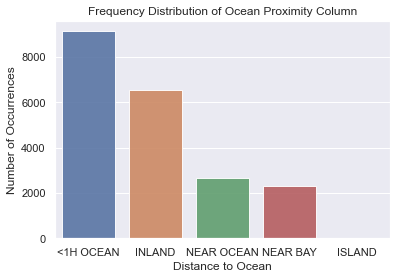

In [22]:
# Barplot demonstration of the ocean_proximity column
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

distance_count = housing['ocean_proximity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(distance_count.index, distance_count.values, alpha=0.9)
plt.title('Frequency Distribution of Ocean Proximity Column')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distance to Ocean', fontsize=12)
plt.show()


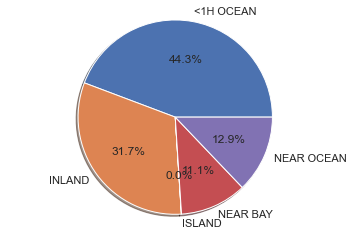

In [23]:
# Pie chart demonstration of the ocean_proximity column
labels = housing['ocean_proximity'].astype('category').cat.categories.tolist()
counts =  housing['ocean_proximity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [24]:
# Number of values for each feature in ocean_proximity columns
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


Since we have only 5 feature in ocean_proximity column and these features are easy to interpret we can replace them with the desired numeric values. In this case, we will score them by their distances to the ocean.<br>
Our placement will look like this; 
- INLAND <  1H TO OCEAN < NEAR_BAY < NEAR_OCEAN < ISLAND

# Handling categorical values
We will create and dictionary which contains features and corresponding values that we hardcoded.

In [25]:
replace_map = {'ocean_proximity': {'<1H OCEAN': 2, 'INLAND': 1, 'NEAR OCEAN': 4, 'NEAR BAY': 3,
                                  'ISLAND': 5}}

In [26]:
housing_replace = housing.copy()
housing_replace.replace(replace_map, inplace=True)
housing_replace.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


# Handling Outliers
 
We detect outliers with using Z-score, our criteria is any data point whose Z-score falls out of 3rd standard deviation is an outlier.<br>
Steps for calculating outliers with using z-score;
- Calculate the Z-score using the formula (x-mean)/std.
- Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.

Once we find outliers, we have consider how to deal with them. There are several techniques for replacing outliers, but we will use the median imputation method. The reason we use the median imputation is that the median method is not affected by the presence of outliers like the mean method.<br>



In [27]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code


In [28]:
sample_outliers = []
# We got (len - 1) because we don't want to look for outliers in categorical values.
for i in range(len(housing_replace.count()) - 1):
    sample_outliers.append(detect_outliers_zscore(housing_replace.iloc[:,i]))


In [29]:
def replace_outliers(data, sample_index):
    median = np.median(data)
    index = 0
    if len(sample_outliers[sample_index]) == 0: # returns if sample has no outlier
        return
    for (i, v) in data.iteritems():
        if sample_outliers[sample_index][index] == v:
            data[i] = median
            if index < len(sample_outliers[sample_index]) - 1:
                index +=1
                

In [30]:
housing_outliers = housing_replace.copy() # We copy our dataframe and replace outliers on this new dataframe.
for i in range(len(sample_outliers)):
    replace_outliers(housing_outliers.iloc[:,i], i)

- We know that the mean of the dataset is affected by outliers, let's check the effect of outliers on our dataset. For this, let's take the average of the columns with and without outliers.

In [31]:
# Mean of columns with and without outliers
df = pd.DataFrame(housing_replace.mean() , columns=['Mean with outliers'])
df['Mean without outliers'] = housing_outliers.mean()

df

,Mean with outliers,Mean without outliers
longitude,-119.569704,-119.569704
latitude,35.631861,35.631861
housing_median_age,28.639486,28.639486
total_rooms,2635.763081,2432.444380
total_bedrooms,537.591279,499.616231
population,1425.476744,1330.515068
households,499.539680,465.958285
median_income,3.870671,3.735332
median_house_value,206855.816909,206855.816909
ocean_proximity,2.051841,2.051841


- We know that the median of the dataset is not affected much by outliers, let's check the effect of outliers on our dataset. For this, let's take the median of the columns with and without outliers.

In [32]:
# Median of columns with and without outliers
df = pd.DataFrame(housing_replace.median() , columns=['Median with outliers'])
df['Median without outliers'] = housing_outliers.median()
df

,Median with outliers,Median without outliers
longitude,-118.4900,-118.49000
latitude,34.2600,34.26000
housing_median_age,29.0000,29.00000
total_rooms,2127.0000,2127.00000
total_bedrooms,435.0000,435.00000
population,1166.0000,1166.00000
households,409.0000,409.00000
median_income,3.5348,3.53475
median_house_value,179700.0000,179700.00000
ocean_proximity,2.0000,2.00000


We could also detect outliers with using Interquartile range (IQR).<br>
Steps for applying IQR;
- Sort the data
- Calculate Q1 and Q3 
- Find IQR (Q3 - Q1)
- Find the lower fence (Q1 - 1.5 * IQR)
- Find the upper fence (Q3 + 1.5 * IQR)


<AxesSubplot:xlabel='median_house_value'>

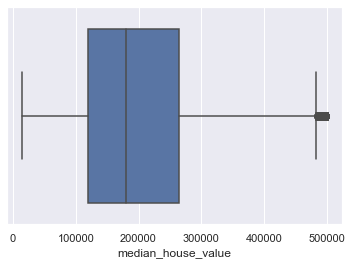

In [33]:
def detect_outliers_iqr(dataset):
    
    outliers = []
    dataset = sorted(dataset)
    q1,q3 = np.percentile(dataset, [25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    for elem in dataset:
        if elem < lower_fence or elem > upper_fence:
            outliers.append(elem)
    return outliers

# We can use box plots for visulazition of outliers
import seaborn as sns

sns.boxplot(housing['median_house_value'])

# Selecting Model

In order to choose the right model, we must ask ourselves what is our purpose. Determining the problem and forming strategies accordingly are very important for choosing the right model. In our problem we are asked to estimate house prices in California. We can see that this is a Regression problem because our task is to approximate a continuous output variable from input variables (X) to a matching function (f).<br>
OK, we have identified the problem, so what do we do next? Since we define the problem we could search for different algorithms for our purpose. We will use Random Forest Reggression model in this project because results from researchs show that random forest reggession model gives the best results so far.<br><br>

We will use sci-kit random forest reggressor as our model. I preffered not divide dataset into train, validation and test. Reason is, since we use random forest as our model using validation set is not mandatory. Also our dataset is small so, fine tuning hyper parameter in training set will not be big problem.


Steps for appliying sci-kit random forest reggressor;
- Rearrenge columns in the dataset for divide into attributes and label sets.
- Split dataset as test and train
- Scale the dataset (It is optional since we use random forest)
- Train model
- Calculate train and test score of the model
- Fine tune hyperparameters for acquiring better accuracy

In [34]:
# Rearranging the order of data in dataset
cols = ['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms', 
        'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value' ]

dataset = housing_outliers.copy()
dataset = dataset[cols]

dataset.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [35]:
# Dividing dataset into attributes and label sets
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values


In [36]:
from sklearn.model_selection import train_test_split


# Split dataset as test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [37]:
from sklearn.preprocessing import StandardScaler

# In our dataset each column has different scale of representation, this may cause problem in some algorithms 
# For preventing that we scale our dataset

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# Training model
regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 5.712958097457886


In [39]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.9748654393230793
Testing score:   0.8247918940609495
Root Mean Squared Error: 47939.427226246225
